In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://stackoverflow.com/questions/9243645/weighted-least-square-fit-a-plane-to-3d-point-set/9243785#9243785

def planeFit(points):
    """
    p, n = planeFit(points)

    Given an array, points, of shape (d,...)
    representing points in d-dimensional space,
    fit an d-dimensional plane to the points.
    Return a point, p, on the plane (the point-cloud centroid),
    and the normal, n.
    """
    import numpy as np
    from numpy.linalg import svd
    points = np.reshape(points, (np.shape(points)[0], -1)) # Collapse trialing dimensions
    assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1], points.shape[0])
    ctr = points.mean(axis=1)
    x = points - ctr[:,np.newaxis]
    M = np.dot(x, x.T) # Could also use np.cov(x) here.
    return ctr, svd(M)[0][:,-1]

In [3]:
planeFit( [[0,0,0], [2,3,0], [4,3,0]])

(array([0.        , 1.66666667, 2.33333333]), array([1., 0., 0.]))

In [ ]:
# coords = [(row, column, z, 1)]
# transf = [(x, y, z, 1)]

coords = np.array([[0,0,0], [2,3,0], [4,3,0]])

coords.transpose()
transf.transpose()

A = np.linalg.lstsq(coords, transf)


In [6]:
import skimage.transform

In [34]:
flat_coords = np.array([[0,0,0], [2,3,0], [4,3,0]])
tilt_coords = np.array([[0,0,1], [2,3,2], [4,3,3]])

tf = skimage.transform.estimate_transform('similarity', flat_coords, tilt_coords)
tf

<SimilarityTransform(matrix=
    [[ 9.54754510e-01,  4.52454896e-02, -4.77912997e-01, -1.77635684e-15],
     [-5.05859952e-02,  1.06744799e+00,  4.25740469e-16, -3.37239968e-02],
     [ 4.77377255e-01,  2.26227448e-02,  9.55825993e-01,  1.00000000e+00],
     [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x2c10e826280>

In [36]:
x = np.linspace(-10,20,23)
y = np.linspace(-8,8,10)
XX, YY = np.meshgrid(x, y)
XX.shape

(10, 23)

In [37]:
tf.params @np.array([[0,0,0,1],[0,2,0,1], [2,3,0,1]]).T

array([[-1.77635684e-15,  9.04909791e-02,  2.04524549e+00],
       [-3.37239968e-02,  2.10117199e+00,  3.06744799e+00],
       [ 1.00000000e+00,  1.04524549e+00,  2.02262274e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [45]:
tf.params @ np.vstack( [XX.flat, YY.flat, np.zeros_like(XX.flat), np.ones_like(XX.flat)])

array([[-9.90950902e+00, -8.60757105e+00, -7.30563308e+00,
        -6.00369511e+00, -4.70175715e+00, -3.39981918e+00,
        -2.09788121e+00, -7.95943239e-01,  5.05994729e-01,
         1.80793270e+00,  3.10987067e+00,  4.41180864e+00,
         5.71374660e+00,  7.01568457e+00,  8.31762254e+00,
         9.61956051e+00,  1.09214985e+01,  1.22234364e+01,
         1.35253744e+01,  1.48273124e+01,  1.61292504e+01,
         1.74311883e+01,  1.87331263e+01, -9.82907259e+00,
        -8.52713463e+00, -7.22519666e+00, -5.92325869e+00,
        -4.62132072e+00, -3.31938275e+00, -2.01744478e+00,
        -7.15506814e-01,  5.86431155e-01,  1.88836912e+00,
         3.19030709e+00,  4.49224506e+00,  5.79418303e+00,
         7.09612100e+00,  8.39805897e+00,  9.69999694e+00,
         1.10019349e+01,  1.23038729e+01,  1.36058108e+01,
         1.49077488e+01,  1.62096868e+01,  1.75116247e+01,
         1.88135627e+01, -9.74863617e+00, -8.44669820e+00,
        -7.14476023e+00, -5.84282226e+00, -4.54088429e+0

In [44]:
np.vstack( [XX.flat, YY.flat, np.zeros_like(XX.flat), np.ones_like(XX.flat)]).shape

(4, 230)

In [46]:
tilt_coords = np.array([[0,0,1], [2,3,2], [4,3,3]])


In [49]:
tilt_coords[:,2]

array([1, 2, 3])

In [51]:
skimage.transform.warp_coords(tf, [[0,0,0]])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [54]:
tf(np.array([0,0,0]).T)

ValueError: too many values to unpack (expected 2)

In [56]:
tf.params @ [2,3,0,1]

array([2.04524549, 3.06744799, 2.02262274, 1.        ])

In [1]:
# Curve fitting version

#https://scipython.com/blog/non-linear-least-squares-fitting-of-a-two-dimensional-data/
    
    
# Polynomial fit
#https://stackoverflow.com/questions/33964913/equivalent-of-polyfit-for-a-2d-polynomial-in-python


In [56]:
points = np.array([
(0.8117, 1.2909, 23.34826),
(1.2024, 1.2909, 23.343410000000002),
(2.1187, 1.2909, 23.32839),
(2.8188, 1.2909, 23.3184),
(4.1179, 1.2909, 23.303379999999997),
(6.6195, 1.2909, 23.26841),
(7.6186, 1.2909, 23.25333),
(9.3181, 1.2909, 23.22832),
(9.3181, 3.0832, 23.22832),
(7.9039, 3.0832, 23.2434),
(7.0185, 3.0832, 23.2584),
(6.0042, 3.0832, 23.2734),
(6.0042, 3.9832, 23.27337),
(6.0042, 0.6837, 23.278370000000002),
(6.0042, -1.6175, 23.28337),
(6.0042, -2.5165, 23.28337),
(6.0042, -5.618, 23.2884),
(6.7194, -6.7178, 23.28337),
(3.8046, -6.7178, 23.32328),
(1.4056, -6.7178, 23.353289999999998),
(0.4061, -6.7178, 23.36828),
(-1.5932, -6.7178, 23.398320000000002),
(-1.5932, -7.7164, 23.39834),
(-1.5932, -8.702, 23.40333),
(-1.5932, -5.7161, 23.39339),
(3.0057, -1.9935, 23.3234),
(1.9944, -1.9935, 23.33837),
(1.9944, -0.9928, 23.338379999999997),
(1.9944, 2.0069, 23.333370000000002),
(-2.0056, 2.0069, 23.38339),
(-2.0056, 0.9931, 23.3883),
(-2.0056, -0.0076, 23.38841),
(-2.0056, -1.0076, 23.39336),
(7.9944, 0.9927, 23.2484),
(9.0054, 0.9927, 23.2334),
(9.0054, -2.9926, 23.2434),
    (9.0054, -4.0068, 23.2434),
(-0.0057, -4.0068, 23.37331),
    (-2.9943, -4.993, 23.41341)

])

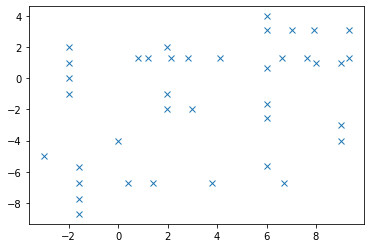

In [57]:
plt.figure()
plt.plot(points[:,0], points[:,1], 'x')

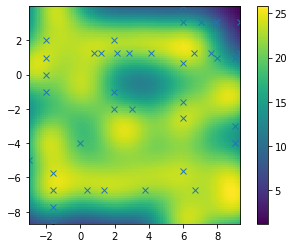

In [58]:
#https://stackoverflow.com/questions/39034797/heatmap-for-nonuniformly-spaced-data
# https://stackoverflow.com/questions/51701844/inaccurate-interpolation-with-scipy-interpolate-rbf
import scipy.interpolate

x = points[:,0]
y = points[:,1]
z = points[:,2]

#create regular grid
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

#interpolate missing data
rbf = scipy.interpolate.Rbf(x, y, z, function='gaussian')
zi = rbf(xi, yi)

plt.figure()
plt.imshow(zi, interpolation='none', extent=[x.min(), x.max(), y.min(), y.max()])
plt.plot(x, y, 'x')
plt.colorbar()

(100, 100)


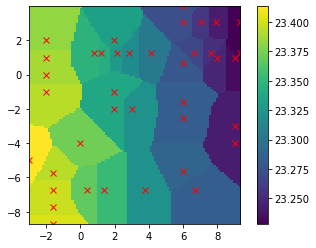

In [59]:
from scipy.interpolate import griddata

x = points[:,0]
y = points[:,1]
z = points[:,2]

#create regular grid
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
print(xi.shape)

zi = griddata(points[:,0:2], z, (xi, yi), method='nearest')
plt.figure()
plt.imshow(zi, interpolation='none', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.plot(x, y, 'rx')
plt.colorbar()